In [1]:
import warnings
warnings.filterwarnings('ignore')

import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from collections import Counter

In [2]:
w = np.load("um_openalex.npy", allow_pickle=True)

In [3]:
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}

In [182]:
work_year = {}
cit_year = {}
for work in w:
    if work["publication_year"] >= 2004 and work["publication_year"] <= 2023:
        if work["publication_year"] not in work_year:
            work_year[work["publication_year"]] = 1
            cit_year[work["publication_year"]] = work["cited_by_count"]
        else:
            work_year[work["publication_year"]] += 1
            cit_year[work["publication_year"]] += work["cited_by_count"]

In [183]:
work_year, cit_year

({2012: 844,
  2006: 557,
  2019: 1234,
  2009: 668,
  2005: 540,
  2017: 1078,
  2014: 993,
  2013: 923,
  2004: 461,
  2007: 650,
  2011: 854,
  2016: 992,
  2020: 1368,
  2015: 972,
  2008: 640,
  2018: 1169,
  2010: 789,
  2022: 1512,
  2021: 1607,
  2023: 1392},
 {2012: 23994,
  2006: 15094,
  2019: 18168,
  2009: 19697,
  2005: 16362,
  2017: 16939,
  2014: 26727,
  2013: 22770,
  2004: 11422,
  2007: 18638,
  2011: 19704,
  2016: 19467,
  2020: 21931,
  2015: 19046,
  2008: 16564,
  2018: 19549,
  2010: 17507,
  2022: 9793,
  2021: 16181,
  2023: 5204})

In [184]:
# work_year um_staff ratio
work_year_staff_ratio = {}
cit_year_staff_ratio = {}
for year in work_year:
    if year in um_staff:
        work_year_staff_ratio[year] = work_year[year] / um_staff[year]
        cit_year_staff_ratio[year] = cit_year[year] / um_staff[year]


In [162]:
work_year_staff_ratio

{2012: 0.9712313003452244,
 2006: 0.5450097847358122,
 2019: 1.3127659574468085,
 2009: 0.723726977248104,
 2005: 0.5781584582441114,
 2017: 1.1872246696035242,
 2014: 1.140068886337543,
 2013: 1.0732558139534885,
 2004: 0.5776942355889725,
 2007: 0.626808100289296,
 2011: 0.9415656008820287,
 2016: 1.117117117117117,
 2020: 1.4553191489361703,
 2015: 1.0933633295838021,
 2008: 0.6153846153846154,
 2018: 1.2775956284153005,
 2010: 0.9121387283236995,
 2022: 1.5475946775844422,
 2021: 1.6739583333333334,
 2023: 1.3864541832669324}

Text(0, 0.5, 'Razmerje št. objav in zaposlenih')

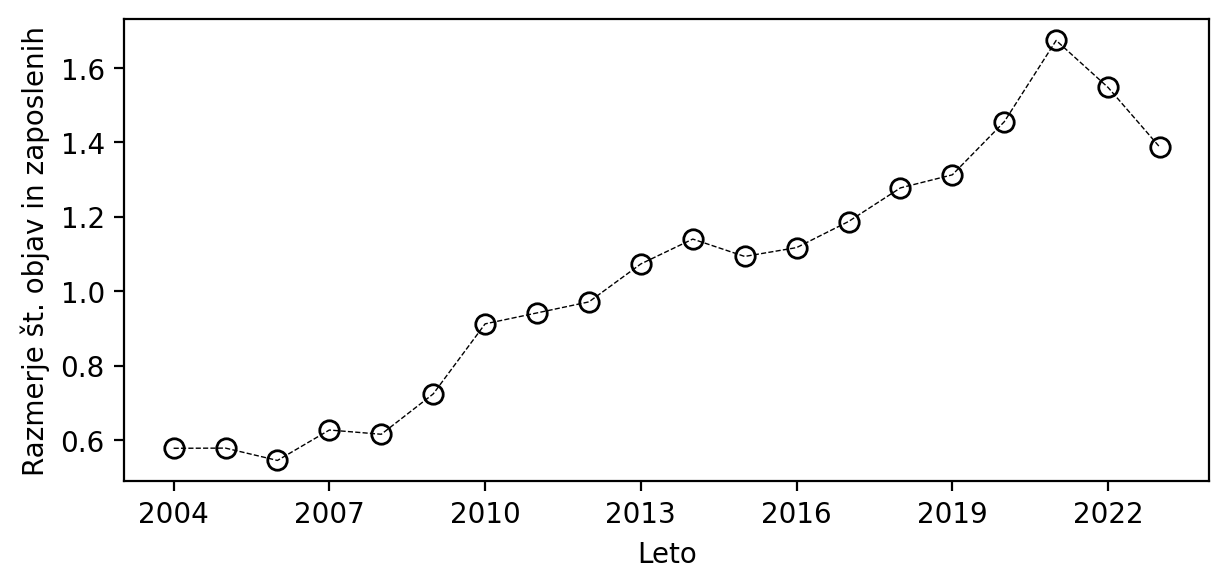

In [189]:
# plot work_year_staff_ratio, first sort data by year
work_year_staff_ratio = dict(sorted(work_year_staff_ratio.items(), key=lambda item: item[0]))
# plot work_year_staff_ratio
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_staff_ratio.keys()), list(work_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. objav in zaposlenih')




Text(0, 0.5, 'Razmerje št. citatov in zaposlenih')

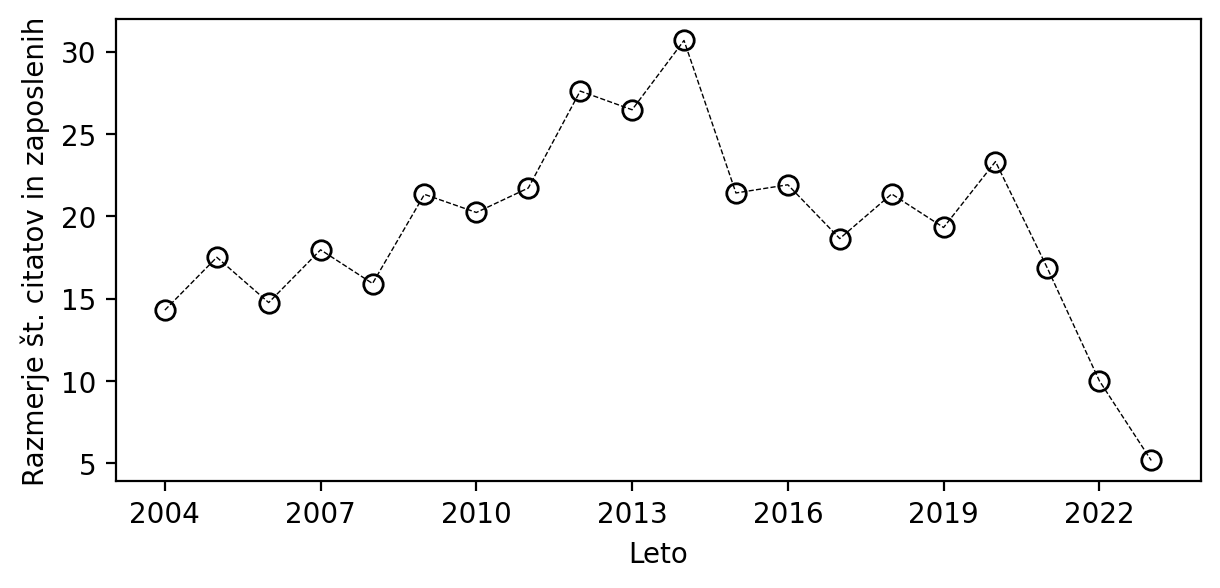

In [190]:
cit_year_staff_ratio = dict(sorted(cit_year_staff_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(cit_year_staff_ratio.keys()), list(cit_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. citatov in zaposlenih')

Text(0, 0.5, 'Razmerje št. citatov in št. objav')

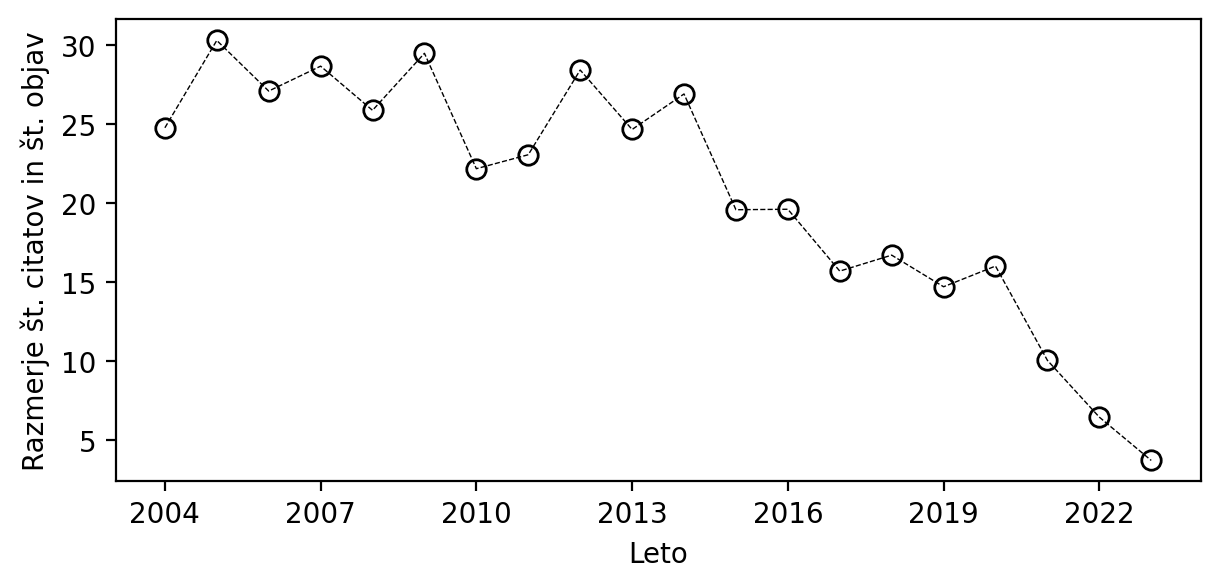

In [191]:
# plot work_year cit_year ratio
work_year_cit_year_ratio = {}
for year in work_year:
    work_year_cit_year_ratio[year] = cit_year[year] / work_year[year]

work_year_cit_year_ratio = dict(sorted(work_year_cit_year_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_cit_year_ratio.keys()), list(work_year_cit_year_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Razmerje št. citatov in št. objav')

Text(0, 0.5, 'št. citatov/št. objav/zaposlenega')

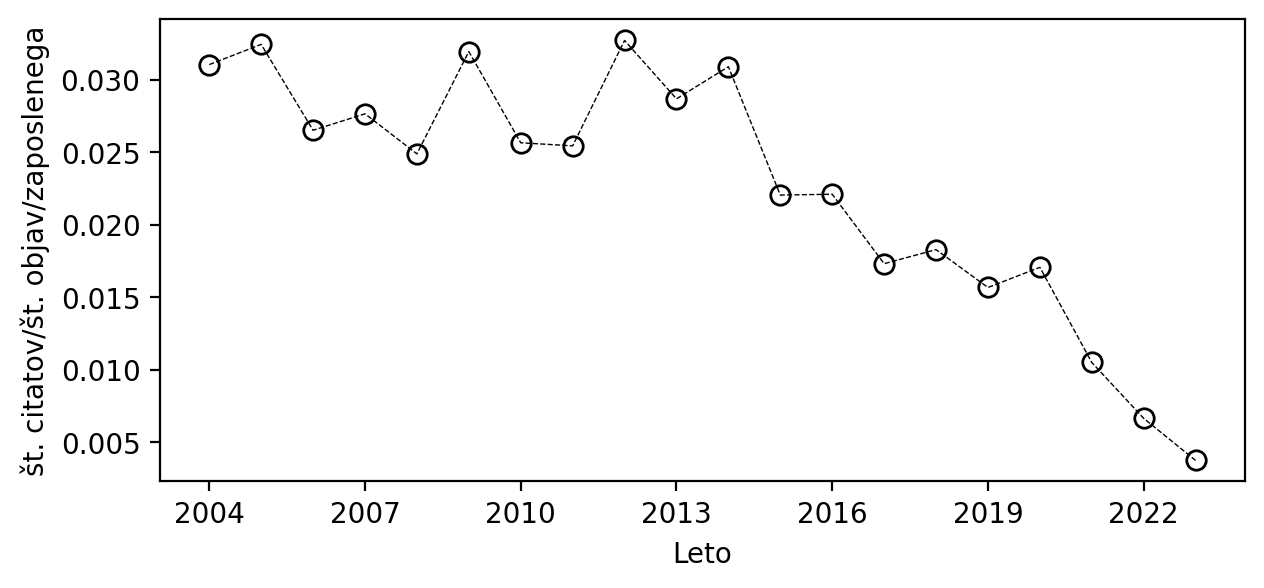

In [193]:
# plot work_year cit_year staff ratio
work_year_cit_year_staff_ratio = {}
for year in work_year:
    work_year_cit_year_staff_ratio[year] = work_year_cit_year_ratio[year] / um_staff[year]

work_year_cit_year_staff_ratio = dict(sorted(work_year_cit_year_staff_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(work_year_cit_year_staff_ratio.keys()), list(work_year_cit_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('št. citatov/št. objav/zaposlenega')

(0.1, 4.2)

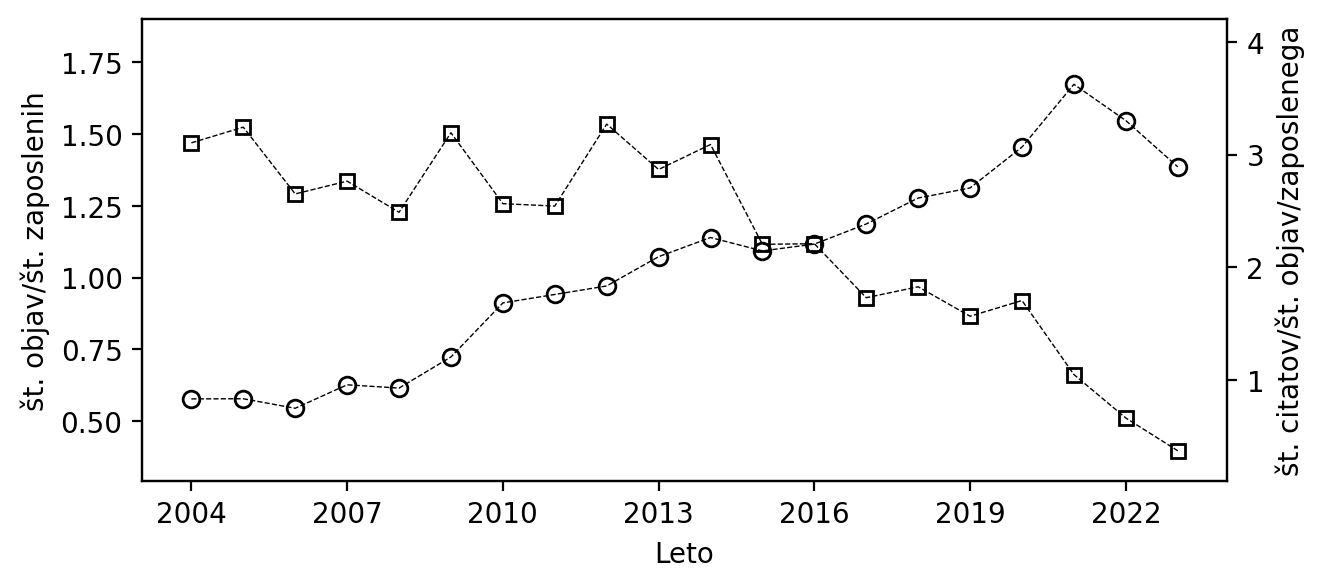

In [220]:
# plot work_year_staff_ratio and work_year_cit_year_staff_ratio in one plot with two y axis
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(work_year_staff_ratio.keys()), list(work_year_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax2.plot(list(work_year_cit_year_staff_ratio.keys()), 100*np.array(list((work_year_cit_year_staff_ratio.values()))), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('št. objav/št. zaposlenih', color='black')
ax2.set_ylabel('št. citatov/št. objav/zaposlenega', color='black')
# set lim for y axis
ax1.set_ylim(0.29, 1.9)
ax2.set_ylim(0.1, 4.2)


In [ ]:
############# FINAL FIGURE 1 #############

In [107]:
classifications = {}
domains = []
subfields = []
fields = []
for work in w:
    #if work["primary_topic"] and work["publication_year"] >= 1980 and work["publication_year"] <= 1990:
    if work["primary_topic"]:
        domain = work["primary_topic"]["domain"]["display_name"]
        domains.append(domain)
        subfield = work["primary_topic"]["subfield"]["display_name"]
        subfields.append(subfield)
        field = work["primary_topic"]["field"]["display_name"]
        fields.append(field)
        if domain not in classifications:
            classifications[domain] = {}
        else:    
            if field not in classifications[domain]:
                classifications[domain][field] = {}
            else:
                if subfield not in classifications[domain][field]:
                    classifications[domain][field][subfield] = 1
                else:
                    classifications[domain][field][subfield] += 1



In [109]:
classifications.keys()

dict_keys(['Life Sciences', 'Physical Sciences', 'Social Sciences', 'Health Sciences'])

In [112]:
classifications["Social Sciences"].keys()

dict_keys(['Social Sciences', 'Psychology', 'Decision Sciences', 'Business, Management and Accounting', 'Economics, Econometrics and Finance', 'Arts and Humanities'])

In [135]:
authors = []
author_count = []
lead_um_works_count = 0
lead_um_works = []
country_codes = []
for work in w:
    count_authors = 0
    for author in work['authorships']:
        count_authors += 1
        country_codes.append(author['countries'])
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] == 'University of Maribor':
                    if author['is_corresponding'] == True or author['author_position'] == 'first':
                    #if author['author_position'] == 'first':
                        authors.append(author['author']['display_name'])
                        lead_um_works_count += 1
                        lead_um_works.append(work)
    author_count.append(count_authors)

In [136]:
LS = []
PE = []
SSH = []
for work in lead_um_works:
    if work["primary_topic"]:
        domain = work["primary_topic"]["domain"]["display_name"]
        if domain == "Life Sciences" or domain == "Health Sciences":
            LS.append(work)
        elif domain == "Physical Sciences":
            PE.append(work)
        elif domain == "Social Sciences":
            SSH.append(work)

In [137]:
len(LS), len(PE), len(SSH)

(3408, 9929, 4280)

In [139]:
# sum LS+PE+SSH
len(LS)+len(PE)+len(SSH), len(lead_um_works)

(17617, 17785)

In [6]:
total_citations = 0
for work in w:
    total_citations += work['cited_by_count']

total_citations

406701

In [140]:
cit_LS = []
cit_PE = []
cit_SSH = []
for work in LS:
    cit_LS.append(work['cited_by_count'])
for work in PE:
    cit_PE.append(work['cited_by_count'])
for work in SSH:
    cit_SSH.append(work['cited_by_count'])


In [141]:
np.mean(cit_LS), np.mean(cit_PE), np.mean(cit_SSH)

(np.float64(18.315140845070424),
 np.float64(17.293584449592103),
 np.float64(10.888785046728971))

In [142]:
np.median(cit_LS), np.median(cit_PE), np.median(cit_SSH)

(np.float64(5.0), np.float64(5.0), np.float64(1.0))

In [31]:
authors = []
author_count = []
lead_um_works_count = 0
lead_um_works = []
country_codes = []
for work in w:
    count_authors = 0
    for author in work['authorships']:
        count_authors += 1
        country_codes.append(author['countries'])
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] == 'University of Maribor':
                    if author['is_corresponding'] == True or author['author_position'] == 'first':
                    #if author['author_position'] == 'first':
                        authors.append(author['author']['display_name'])
                        lead_um_works_count += 1
                        lead_um_works.append(work)
    author_count.append(count_authors)


In [147]:
np.mean(author_count), np.median(author_count)

(np.float64(6.384019055868341), np.float64(3.0))

In [26]:
lead_um_works_count

17785

In [28]:
lead_um_works[1]

{'id': 'https://openalex.org/W2000929155',
 'doi': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
 'title': 'Coevolutionary games—A mini review',
 'display_name': 'Coevolutionary games—A mini review',
 'publication_year': 2009,
 'publication_date': '2009-10-17',
 'ids': {'openalex': 'https://openalex.org/W2000929155',
  'doi': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
  'mag': '2000929155',
  'pmid': 'https://pubmed.ncbi.nlm.nih.gov/19837129'},
 'language': 'en',
 'primary_location': {'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1016/j.biosystems.2009.10.003',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S99347777',
   'display_name': 'Biosystems',
   'issn_l': '0303-2647',
   'issn': ['0303-2647', '1872-8324'],
   'is_oa': False,
   'is_in_doaj': False,
   'is_core': True,
   'host_organization': 'https://openalex.org/P4310320990',
   'host_organization_name': 'Elsevier BV',
   'host_organization_lineage': ['https://openalex.org/P4310320990']

In [38]:
country_codes = [item for sublist in country_codes for item in sublist]

In [39]:
Counter(country_codes)

Counter({'SI': 58961,
         'JP': 17395,
         'US': 9223,
         'KR': 8246,
         'RU': 6979,
         'DE': 5830,
         'TW': 4030,
         'IN': 3648,
         'AT': 3341,
         'PL': 2647,
         'CN': 2561,
         'AU': 2466,
         'ES': 2223,
         'HR': 2016,
         'GB': 1897,
         'IT': 1875,
         'RS': 1608,
         'CZ': 1462,
         'CH': 1053,
         'FR': 1008,
         'NL': 854,
         'HU': 704,
         'PT': 619,
         'SE': 543,
         'TR': 542,
         'BE': 523,
         'CA': 503,
         'GR': 499,
         'SA': 483,
         'RO': 477,
         'SK': 436,
         'DK': 433,
         'BR': 429,
         'IR': 410,
         'BA': 394,
         'NO': 329,
         'FI': 298,
         'UA': 228,
         'MY': 163,
         'IE': 158,
         'IL': 143,
         'ZA': 142,
         'SG': 139,
         'BG': 136,
         'KP': 136,
         'MK': 136,
         'PK': 132,
         'ME': 112,
         'LT': 111

In [7]:
w[2]['primary_location']['source']['display_name']

'Scientific Reports'

In [ ]:
############## podatki po desetletjih ##############

In [341]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in w:
    if work["publication_year"] <= 2000:
        c1 += 1
    if work["publication_year"] >= 2000 and work["publication_year"] <= 2010:
        c2 += 1
    if work["publication_year"] >= 2010 and work["publication_year"] <= 2020:
        c3 += 1
    if work["publication_year"] >= 2020:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

TypeError: string indices must be integers, not 'str'

In [316]:
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in PE:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in LS:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))

c1 = 0
c2 = 0
c3 = 0
c4 = 0
for work in SSH:
    if work["publication_year"] <= 1990:
        c1 += 1
    if work["publication_year"] >= 1991 and work["publication_year"] <= 2000:
        c2 += 1
    if work["publication_year"] >= 2001 and work["publication_year"] <= 2010:
        c3 += 1
    if work["publication_year"] >= 2011:
        c4 += 1

print(c1, c2, c3, c4)
print(np.array([c1,c2,c3,c4])/(c1+c2+c3+c4))


103 729 2808 6289
[0.01037365 0.07342129 0.28280794 0.63339712]
20 117 631 2640
[0.00586854 0.03433099 0.18515258 0.77464789]
22 127 685 3446
[0.00514019 0.0296729  0.16004673 0.80514019]


In [395]:

num_cit = {}
num_works = {}
for year in range(1975, 2024):
    for work in lead_um_works:
        if work["publication_year"] == year:
            if year not in num_works:
                num_works[year] = 1
                num_cit[year] = work["cited_by_count"]
            else:
                num_works[year] += 1
                num_cit[year] += work["cited_by_count"]

(2000.0, 2005.0)

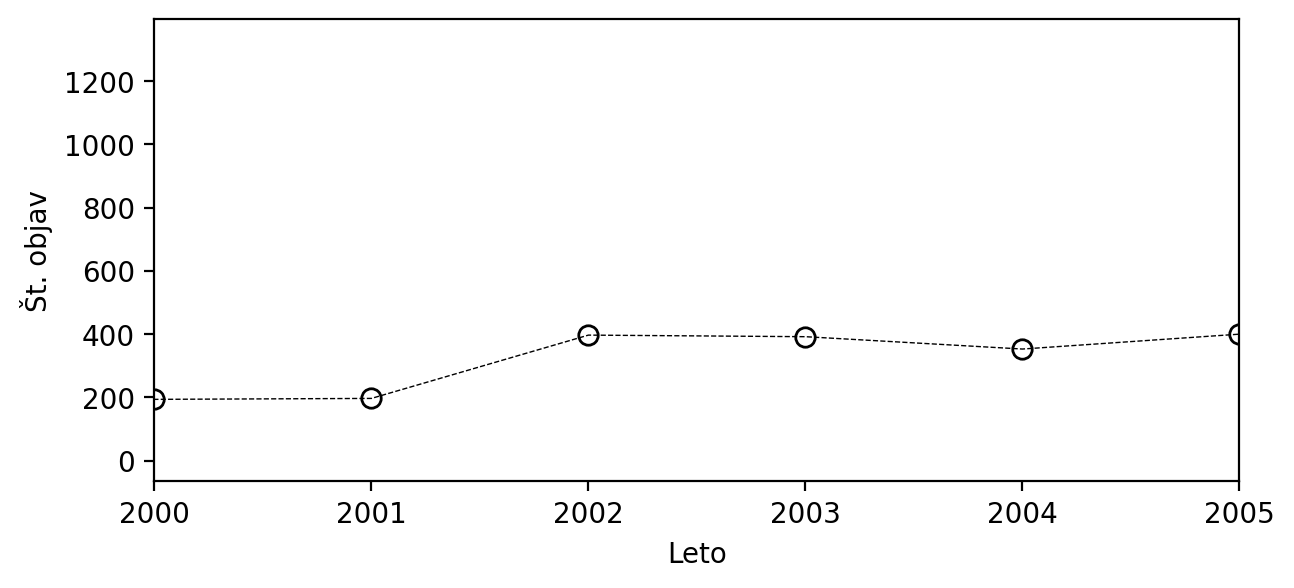

In [396]:
# plot num_works
num_works = dict(sorted(num_works.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(num_works.keys()), list(num_works.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(1975, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Št. objav')
# plot ticks every 3 years
plt.xticks(np.arange(1975, 2024, 1));
plt.xlim(2000, 2005)

In [290]:
concepts0 = {}
concepts1 = {}
concepts2 = {}
concepts3 = {}
for work in SSH:
    if work["concepts"] and work["publication_year"] <= 1990:
        concept_list = work["concepts"]
        for c in concept_list:
            concept = c["display_name"]
            level = c["level"]
            if level == 0:
                if concept not in concepts0:
                    concepts0[concept] = 1
                else:
                    concepts0[concept] += 1
            if level == 1:
                if concept not in concepts1:
                    concepts1[concept] = 1
                else:
                    concepts1[concept] += 1
            if level == 2:
                if concept not in concepts2:
                    concepts2[concept] = 1
                else:
                    concepts2[concept] += 1
            if level == 3:
                if concept not in concepts3:
                    concepts3[concept] = 1
                else:
                    concepts3[concept] += 1

In [291]:
# sort concepts by value
concepts0 = dict(sorted(concepts0.items(), key=lambda item: item[1], reverse=True))
concepts1 = dict(sorted(concepts1.items(), key=lambda item: item[1], reverse=True))
concepts2 = dict(sorted(concepts2.items(), key=lambda item: item[1], reverse=True))
concepts3 = dict(sorted(concepts3.items(), key=lambda item: item[1], reverse=True))

In [292]:
concepts1

{'Law': 7,
 'Epistemology': 5,
 'Marketing': 3,
 'Cognitive psychology': 2,
 'Neuroscience': 2,
 'Process management': 2,
 'Computer security': 2,
 'Linguistics': 2,
 'Finance': 2,
 'Knowledge management': 2,
 'Mechanical engineering': 2,
 'Operating system': 2,
 'Management science': 2,
 'Humanities': 2,
 'Management': 2,
 'Social psychology': 1,
 'Communication': 1,
 'Econometrics': 1,
 'Operations management': 1,
 'Computer vision': 1,
 'Industrial organization': 1,
 'Macroeconomics': 1,
 'Pedagogy': 1,
 'Public relations': 1,
 'Business administration': 1,
 'Economic history': 1,
 'Aeronautics': 1,
 'Risk analysis (engineering)': 1,
 'Psychiatry': 1,
 'Aerospace engineering': 1,
 'Forensic engineering': 1,
 'Criminology': 1,
 'Botany': 1,
 'Acoustics': 1,
 'Quantum mechanics': 1,
 'Engineering ethics': 1,
 'Cognitive science': 1,
 'Law and economics': 1,
 'Oceanography': 1,
 'Engineering management': 1,
 'Biochemistry': 1}

In [302]:
institutions = {}
for work in PE:
    for author in work['authorships']:
        if 'institutions' in author.keys():
            for institution in author['institutions']:
                if institution['display_name'] not in institutions:
                    institutions[institution['display_name']] = 1
                else:
                    institutions[institution['display_name']] += 1

In [303]:
institutions = dict(sorted(institutions.items(), key=lambda item: item[1], reverse=True))

In [304]:
institutions

{'University of Maribor': 24126,
 'University of Ljubljana': 1149,
 'Jožef Stefan Institute': 815,
 'Institute of Mathematics, Physics, and Mechanics': 538,
 'Graz University of Technology': 260,
 'National Institute of Chemistry': 195,
 'University of Belgrade': 138,
 'University of Graz': 131,
 'University of Primorska': 130,
 'University of Zagreb': 128,
 'University of Pennsylvania': 97,
 'Institute for Environmental Protection and Sensors': 97,
 'Zlatarna Celje (Slovenia)': 95,
 'University Clinical Centre Maribor': 81,
 'University of Novi Sad': 75,
 'University of Warsaw': 72,
 'Jožef Stefan International Postgraduate School': 70,
 'Institute of Metals and Technology': 62,
 'University of Split': 59,
 'PoliMaT Centre of Excellence (Slovenia)': 56,
 'Faculty (United Kingdom)': 55,
 'Complexity Science Hub Vienna': 53,
 'University of Nova Gorica': 53,
 'Institute of Physics': 52,
 'Montanuniversität Leoben': 51,
 'RWTH Aachen University': 51,
 'Technical University of Denmark': 4

In [ ]:
################################## primerjava z WOS ##################################

In [85]:
incites = pd.read_excel("./um_incites.xlsx")

In [86]:
incites

,Accession Number,DOI,Pubmed ID,Article Title,Authors,Source,Research Area,Document Type,Volume,Issue,Pages,Publication Date,Times Cited,Journal Expected Citations,Category Expected Citations,Journal Normalized Citation Impact,Category Normalized Citation Impact,Percentile in Subject Area,Journal Impact Factor
0,WOS:000310434500042,10.1038/nature11582,MEDLINE:23128233,Host-microbe interactions have shaped the gene...,"Jostins, Luke; Ripke, Stephan; Weersma, Rinse ...",NATURE,GENETICS & HEREDITY,Article,491.0,7422,119-124,2012,3501,523.704682,45.43,6.69,77.0640,99.9657,38.597
1,WOS:000242751400002,10.1109/TEVC.2006.872133,NaN,Self-adapting control parameters in differenti...,"Brest, Janez; Greiner, Saso; Boskovic, Borko; ...",IEEE TRANSACTIONS ON EVOLUTIONARY COMPUTATION,"COMPUTER SCIENCE, THEORY & METHODS; COMPUTER S...",Article,10.0,6,646-657,2006,2380,249.674419,18.49,9.53,128.7450,99.9726,3.770
2,WOS:000187719300012,10.1103/PhysRevLett.91.262001,MEDLINE:14754041,Observation of a narrow charmoniumlike state i...,"Choi, SK; OLSEN, SL; Abe, K; Abe, T; Adachi, I...",PHYSICAL REVIEW LETTERS,"PHYSICS, MULTIDISCIPLINARY",Article,91.0,26,NaN,2003,1751,105.403781,32.43,16.61,53.9948,99.9602,7.035
3,WOS:000274868700004,10.1016/j.biosystems.2009.10.003,MEDLINE:19837129,Coevolutionary games-A mini review,"Perc, Matjaz; Szolnoki, Attila",BIOSYSTEMS,BIOLOGY; MATHEMATICAL & COMPUTATIONAL BIOLOGY,Review,99.0,2,109-125,2010,1566,528.000000,126.90,2.97,12.3406,99.4958,1.478
4,WOS:000273133200031,10.1177/147323000903700531,MEDLINE:19930861,The Wound Healing Process: an Overview of the ...,"Velnar, T.; Bailey, T.; Smrkoli, V.",JOURNAL OF INTERNATIONAL MEDICAL RESEARCH,"PHARMACOLOGY & PHARMACY; MEDICINE, RESEARCH & ...",Review,37.0,5,1528-1542,2009,1491,126.600000,72.08,11.78,20.6854,99.9171,0.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21024,WOS:001162939500006,10.19233/ASHS.2023.26,NaN,"""NEW TEMPLE OF LEARNING"": THE ESTABLISHMENT OF...","Melansek, Tadeja; Fris, Darko",ANNALES-ANALI ZA ISTRSKE IN MEDITERANSKE STUDI...,"HUMANITIES, MULTIDISCIPLINARY",Article,33.0,3,515-526,2023,0,0.026316,0.55,0.00,0.0000,0.0000,0.400
21025,WOS:000315474000002,NaN,NaN,"""Literary Jokes in August W. v. Schlegel's Sty...","Birk, Matjaz",ARCADIA,LITERATURE,Article,47.0,2,272-286,2012,0,0.777778,2.63,0.00,0.0000,0.0000,NaN
21026,WOS:001171272800001,10.1016/j.heliyon.2023.e23950,MEDLINE:38347903,"""Impact of Nigeria's industrial sector on leve...","Zakari, Abdulrasheed; Toplak, Jurij; Ibtissem,...",HELIYON,ECONOMICS,Correction,10.0,2,NaN,2024,0,0.111111,0.03,0.00,0.0000,0.0000,NaN
21027,WOS:001081198700006,10.7592/FEJF2023.89.poljak_istenic,NaN,"""HERE AND THERE ONE SEED SPROUTS, AND THEN IT ...","Istenic, Sasa Poljak",FOLKLORE-ELECTRONIC JOURNAL OF FOLKLORE,FOLKLORE,Article,NaN,89,143-160,2023,0,0.216216,0.15,0.00,0.0000,0.0000,0.200


In [87]:
# read in the data from ./um_wos folder containing the data from Web of Science in several xlsx files of the form "um01.xlsx" ... "um21.xlsx"
# and merge them into one dataframe
wos = pd.read_excel("./um_wos/um01.xls")
for i in range(2, 22):
    wos_ = pd.read_excel(f"./um_wos/um{i:02d}.xls")
    wos = pd.concat([wos, wos_])


In [88]:
wos

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Bresar, B; Ferme, J; Holub, P; Jakovac, M; Mel...",NaN,NaN,NaN,"Bresar, Bostjan; Ferme, Jasmina; Holub, Premys...",NaN,NaN,S-packing colorings of distance graphs with di...,APPLIED MATHEMATICS AND COMPUTATION,...,Science Citation Index Expanded (SCI-EXPANDED),Mathematics,N1B8N,NaN,"hybrid, Green Submitted",NaN,NaN,2024-12-06,WOS:001361776400001,0
1,J,"Arioz, U; Smrke, U; Plohl, N; Spes, T; Musil, ...",NaN,NaN,NaN,"Arioz, Umut; Smrke, Urska; Plohl, Nejc; Spes, ...",NaN,NaN,Scoping Review of Technological Solutions for ...,AGING AND DISEASE,...,Science Citation Index Expanded (SCI-EXPANDED),Geriatrics & Gerontology,JB6D7,38421834.0,gold,NaN,NaN,2024-12-06,WOS:001170724300001,0
2,J,"Fister, I Jr; Farthofer, LA; Pecnik, L; Fister...",NaN,NaN,NaN,"Fister Jr, Iztok; Farthofer, Laurenz A.; Pecni...",NaN,NaN,NiaAML: AutoML for classification and regressi...,SOFTWAREX,...,Science Citation Index Expanded (SCI-EXPANDED),Computer Science,N2S0B,NaN,NaN,NaN,NaN,2024-12-06,WOS:001362884000001,0
3,J,"Dolinar, G; Ilisevic, D; Kuzma, B; Marovt, J",NaN,NaN,NaN,"Dolinar, Gregor; Ilisevic, Dijana; Kuzma, Boja...",NaN,NaN,Bi-monotone maps on the set of all variance-co...,LINEAR ALGEBRA AND ITS APPLICATIONS,...,Science Citation Index Expanded (SCI-EXPANDED),Mathematics,M2A2M,NaN,Green Submitted,NaN,NaN,2024-12-06,WOS:001355610000001,0
4,J,"Cajnko, P; Cajnko, K; Gomboc, T",NaN,NaN,NaN,"Cajnko, Petra; Cajnko, Kaja; Gomboc, Timi",NaN,NaN,Harnessing coaching skills for children's ment...,INTERACCION Y PERSPECTIVA,...,Emerging Sources Citation Index (ESCI),Social Work,M1Q7P,NaN,NaN,NaN,NaN,2024-12-06,WOS:001355362200023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,J,"ALUJEVIC, A",NaN,NaN,NaN,"ALUJEVIC, A",NaN,NaN,3-DIMENSIONAL FINITE-ELEMENT PROGRAMS FOR STRE...,ATOMKERNENERGIE,...,Science Citation Index Expanded (SCI-EXPANDED),Energy & Fuels; Nuclear Science & Technology; ...,DF019,NaN,NaN,NaN,NaN,2024-12-06,WOS:A1977DF01900006,0
241,J,"KRALJ, J",NaN,NaN,NaN,"KRALJ, J",NaN,NaN,IS THERE A ROLE FOR MANAGERS,JOURNAL OF GENERAL MANAGEMENT,...,Social Science Citation Index (SSCI),Business & Economics,DP175,NaN,NaN,NaN,NaN,2024-12-06,WOS:A1977DP17500002,0
242,J,"CVIKL, B",NaN,NaN,NaN,"CVIKL, B",NaN,NaN,CONTRIBUTION OF CORRELATIONS OF DIRECTOR FLUCT...,PHYSICS LETTERS A,...,Science Citation Index Expanded (SCI-EXPANDED),Physics,BX363,NaN,NaN,NaN,NaN,2024-12-06,WOS:A1976BX36300018,0
243,J,"CEH, M; STROPNIK, C; LESKOVAR, S",NaN,NaN,NaN,"CEH, M; STROPNIK, C; LESKOVAR, S",NaN,NaN,POTENTIOMETRIC DETERMINATION OF MOLECULAR-WEIG...,STARKE,...,Science Citation Index Expanded (SCI-EXPANDED),Food Science & Technology,BG678,NaN,NaN,NaN,NaN,2024-12-06,WOS:A1976BG67800003,0


In [89]:
wos.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [224]:
wos_doi = wos['DOI']
incites_doi = incites['DOI']
incites_doi = incites_doi.dropna()
wos_doi = wos_doi.dropna()
openalex_doi = [work['doi'] for work in w]
#openalex_doi = [work['doi'] for work in lead_um_works]
openalex_doi = [doi for doi in openalex_doi if doi]
openalex_doi = [doi.replace("https://doi.org/", "") for doi in openalex_doi]
# normalize dois to lowercase
wos_doi = wos_doi.str.lower()
incites_doi = incites_doi.str.lower()
openalex_doi = [doi.lower() for doi in openalex_doi]



In [225]:
# how many DOIs are in both datasets
len(set(wos_doi) & set(incites_doi))

14954

In [226]:
# how many DOIs are in openalex and incites
len(set(openalex_doi) & set(incites_doi)), len(set(openalex_doi) & set(wos_doi))

(13050, 12738)

In [227]:
len(set(openalex_doi) & set(wos_doi))/len(set(wos_doi)), len(set(openalex_doi) & set(incites_doi))/len(set(incites_doi))

(0.8493132417655688, 0.8483942270185931)

In [ ]:
################

In [334]:
wos["Publication Year"].min(), wos["Publication Year"].max()

(np.int64(1976), np.int64(2025))

In [335]:
# count works by year
works_by_year = wos["Publication Year"].value_counts()

In [336]:
works_by_year = works_by_year.sort_index()

In [337]:
works_by_year

Publication Year
1976       3
1977       2
1978       7
1979       1
1980       5
1981       4
1982       7
1983       8
1984       7
1985       7
1986       7
1987       9
1988      18
1989      21
1990      26
1991      31
1992      50
1993      73
1994     108
1995     135
1996     165
1997     198
1998     241
1999     214
2000     298
2001     264
2002     379
2003     409
2004     435
2005     501
2006     473
2007     642
2008     729
2009     669
2010     777
2011     787
2012     780
2013     812
2014     804
2015     853
2016     866
2017     863
2018     909
2019    1108
2020    1060
2021    1195
2022    1179
2023    1068
2024    1022
2025      16
Name: count, dtype: int64

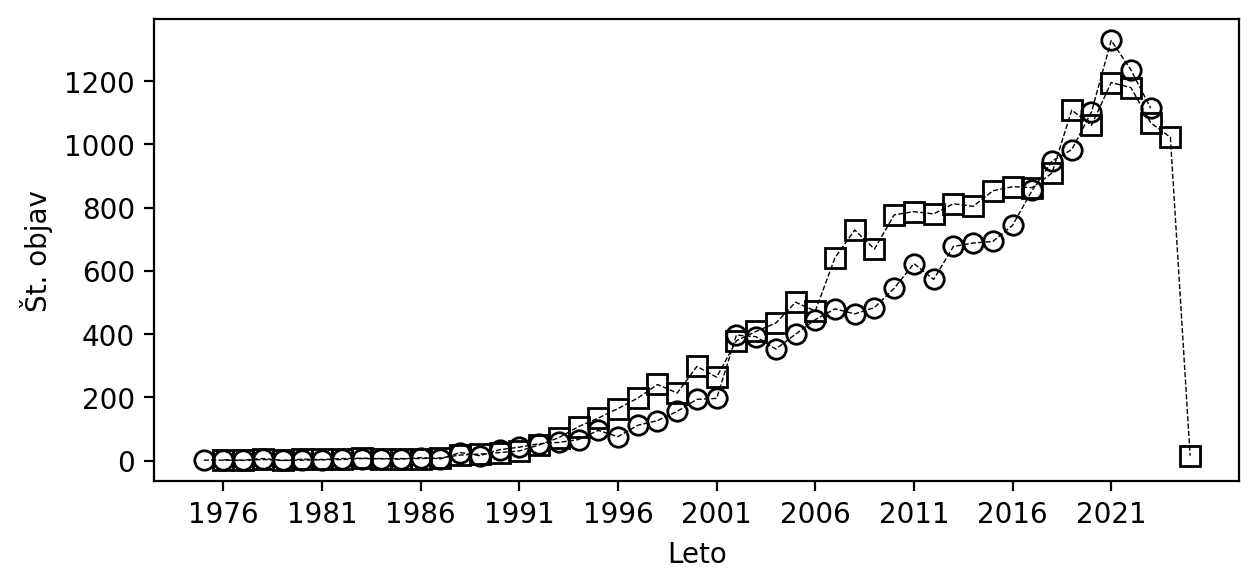

In [399]:
# plot works_by_year
plt.figure(figsize=(7, 3))
plt.plot(works_by_year.index, works_by_year.values, marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.plot(list(num_works.keys()), list(num_works.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.xlabel('Leto')
plt.ylabel('Št. objav')
# plot ticks every 3 years
plt.xticks(np.arange(1976, 2024, 5));
#plt.xlim(2015, 2021)

In [347]:
incites.keys()

Index(['Accession Number', 'DOI', 'Pubmed ID', 'Article Title', 'Authors',
       'Source', 'Research Area', 'Document Type', 'Volume', 'Issue', 'Pages',
       'Publication Date', 'Times Cited', 'Journal Expected Citations',
       'Category Expected Citations', 'Journal Normalized Citation Impact',
       'Category Normalized Citation Impact', 'Percentile in Subject Area',
       'Journal Impact Factor'],
      dtype='object')

In [350]:
incites["Publication Date"].min()

np.int64(1980)

In [400]:
w2001 = []
w2002 = []
for work in lead_um_works:
    if work["publication_year"] == 2001:
        w2001.append(work)
    if work["publication_year"] == 2002:
        w2002.append(work)

In [401]:
len(w2001), len(w2002)

(197, 397)

In [402]:
for work in w2001:
    print(work["title"])

Chiral four-dimensional N=1 supersymmetric type IIA orientifolds from intersecting D6-branes
Novel Paracellin-1 Mutations in 25 Families with Familial Hypomagnesemia with Hypercalciuria and Nephrocalcinosis
Activity and stability of lipases from different sources in supercritical carbon dioxide and near‐critical propane
Activity and stability of lipases from different sources in supercritical carbon dioxide and near‐critical propane
High pressure extraction of vitamin E-rich oil from Silybum marianum
Sol–gel based optical sensor for continuous determination of dissolved hydrogen peroxide
Structure of continuously cast Ni-based superalloy Inconel 713C
Universal fine structure of nematic hedgehogs
Telerobotics experiments via Internet
Surface characterisation of NH3 plasma treated polyamide 6 foils
Differences in event-related and induced EEG patterns in the theta and alpha frequency bands related to human emotional intelligence
Reactivity and electrokinetical properties of different typ

In [403]:
authors2001 = []
for work in w2001:
    for author in work["authorships"]:
        if "institutions" in author.keys():
            for institution in author["institutions"]:
                if institution["display_name"] == "University of Maribor":
                    authors2001.append(author["author"]["display_name"])

authors2002 = []
for work in w2002:
    for author in work["authorships"]:
        if "institutions" in author.keys():
            for institution in author["institutions"]:
                if institution["display_name"] == "University of Maribor":
                    authors2002.append(author["author"]["display_name"])



In [404]:
Counter(authors2001).most_common()

[('Željko Knez', 19),
 ('Mojca Škerget', 7),
 ('Milan Marčič', 7),
 ('Karin Stana‐Kleinschek', 6),
 ('Simona Strnad', 6),
 ('Maja Habulin', 5),
 ('Peter Kokol', 5),
 ('Gorazd Bunc', 5),
 ('Jurij Avsec', 5),
 ('Tatjana Kreže', 4),
 ('Zoran Novak', 4),
 ('Borut Žalik', 4),
 ('J. Balič', 4),
 ('Vili Podgorelec', 4),
 ('Karel Jezernik', 4),
 ('Milan Zorman', 4),
 ('Matej Šprogar', 4),
 ('Aleksandra Lobnik', 3),
 ('Bojan Štumberger', 3),
 ('Anton Hamler', 3),
 ('Milan Reljič', 3),
 ('Veljko Vlaisavljević', 3),
 ('Boštjan Brešar', 3),
 ('V. Žumer', 3),
 ('Peter Planinšič', 3),
 ('Jelka Geršak', 3),
 ('Matjaž Colnarič', 3),
 ('Zdravko Kačič', 3),
 ('Damjan Zazula', 3),
 ('Alojz Gregorič', 2),
 ('Samo Kralj', 2),
 ('Riko Šafarič', 2),
 ('Matjaž Debevc', 2),
 ('Norbert Jaušovec', 2),
 ('Ksenija Jaušovec', 2),
 ('Ivan Gerlič', 2),
 ('Marko Jesenik', 2),
 ('Breda Kegl', 2),
 ('Stanislav Pehan', 2),
 ('Mirt Kamenik', 2),
 ('Miran Brezočnik', 2),
 ('V. Doleček', 2),
 ('Aleš Hace', 2),
 ('M. Terbuc'

In [405]:
Counter(authors2002).most_common()

[('K. Jezernik', 42),
 ('Peter Kokol', 22),
 ('V. Žumer', 15),
 ('Ivan Rozman', 14),
 ('Damjan Zazula', 14),
 ('M. Milanovič', 13),
 ('Sandi Klavžar', 11),
 ('Vojko Matko', 11),
 ('F. Mihalič', 10),
 ('Bruno Stiglic', 9),
 ('Karin Stana‐Kleinschek', 9),
 ('Denis Đonlagić', 9),
 ('Riko Šafarič', 8),
 ('Ž. Čučej', 8),
 ('Drago Dolinar', 8),
 ('József Györkös', 8),
 ('Vili Podgorelec', 7),
 ('Miran Rodič', 7),
 ('P. Cafuta', 7),
 ('Boris Curk', 7),
 ('B. Horvat', 7),
 ('Milan Zorman', 7),
 ('Milan Ojsteršek', 7),
 ('Mitja Lenič', 6),
 ('Tatjana Kreže', 6),
 ('Zdravko Kačič', 6),
 ('B. Grc̆ar', 6),
 ('Aleš Hace', 6),
 ('Alenka Hren', 6),
 ('Marjan Golob', 6),
 ('Domen Verber', 6),
 ('Tatjana Kapus', 6),
 ('Željko Knez', 5),
 ('Gorazd Štumberger', 5),
 ('Bojan Štumberger', 5),
 ('Majda Sfiligoj Smole', 5),
 ('Jurij Avsec', 5),
 ('Milan Marčič', 5),
 ('Marjan Heričko', 5),
 ('Boris Tovornik', 5),
 ('Denis Ðonlagić', 5),
 ('Matjaž Colnarič', 5),
 ('Vojko Potočan', 5),
 ('Tatjana Welzer', 5),


In [ ]:
# set up data structures for counting works by author by year
authors = {}
for work in wos.iterrows():
    work = work[1]
    for author in work["Authors"].split(";"):
        if author not in authors:
            authors[author] = {}
        if work["Publication Year"] not in authors[author]:
            authors[author][work["Publication Year"]] = 1
        else:
            authors[author][work["Publication Year"]] += 1

In [432]:
author_timelines = {}
for work in w:
    for author in work["authorships"]:
        if "institutions" in author.keys():
            for institution in author["institutions"]:
                if institution["display_name"] == "University of Maribor":
                    if author["author"]["display_name"] not in author_timelines:
                        author_timelines[author["author"]["display_name"]] = {}
                        author_timelines[author["author"]["display_name"]][work["publication_year"]] = 1
                    else:
                        if work["publication_year"] not in author_timelines[author["author"]["display_name"]]:
                            author_timelines[author["author"]["display_name"]][work["publication_year"]] = 1
                        else:
                            author_timelines[author["author"]["display_name"]][work["publication_year"]] += 1


In [433]:
# sort author_timelines by number year
author_timelines = {k: dict(sorted(v.items(), key=lambda item: item[0])) for k, v in author_timelines.items()}

(2004.0, 2024.0)

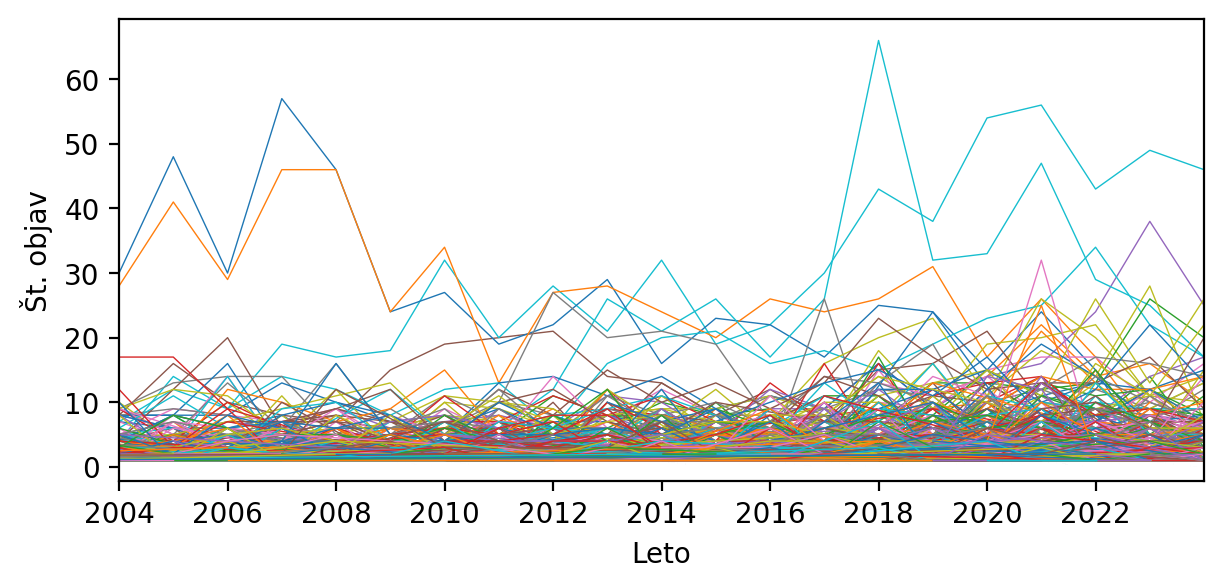

In [497]:
# plot author timelines
fig, ax = plt.subplots(figsize=(7, 3))
for author in author_timelines:
    ax.plot(list(author_timelines[author].keys()), list(author_timelines[author].values()), marker='', linestyle='-', linewidth=0.5, mfc = 'none', ms=3)
plt.xlabel('Leto')
plt.ylabel('Št. objav')
plt.xticks(np.arange(2004, 2024, 2));
plt.xlim(2004,2024)

In [435]:
# find authors in author_timelines with most papers per year
author_timelines_max = {k: max(v.values()) for k, v in author_timelines.items()}
author_timelines_max = dict(sorted(author_timelines_max.items(), key=lambda item: item[1], reverse=True))


In [436]:
author_timelines_max

{'Iztok Fister': 66,
 'M. Bračko': 57,
 'Matjaž Perc': 56,
 'S. Korpar': 46,
 'K. Jezernik': 46,
 'Matjaž Finšgar': 38,
 'Željko Knez': 34,
 'Iztok Takač': 32,
 'Uroš Maver': 28,
 'Karin Stana‐Kleinschek': 27,
 'Gorazd Štumberger': 26,
 'Gregor Štiglic': 26,
 'Andrej Šorgo': 26,
 'Rebeka Rudolf': 26,
 'Peter Kokol': 25,
 'Roman Gumzej': 25,
 'Matjaž Zwitter': 24,
 'Sandi Klavžar': 23,
 'Uroš Potočnik': 22,
 'Aleš Holobar': 22,
 'Nenad Gubeljak': 22,
 'Peter Majerič': 22,
 'Marjan Mernik': 21,
 'Andraž Stožer': 21,
 'Matej Vesenjak': 21,
 'Izidor Mlakar': 20,
 'Mario Gorenjak': 19,
 'Vanja Kokol': 18,
 'Urban Bren': 17,
 'Nino Fijačko': 17,
 'Zalika Klemenc–Ketiš': 17,
 'Dušan Fister': 17,
 'V. Žumer': 16,
 'Zdravko Kravanja': 16,
 'M. Trlep': 16,
 'Radovan Hojs': 16,
 'Gorazd Meško': 16,
 'Sebastijan Seme': 16,
 'Lidija Gradišnik': 16,
 'Ž. Čučej': 16,
 'Maja Leitgeb': 15,
 'Tina Maver': 15,
 'Maša Knez Marevci': 15,
 'Polona Tominc': 15,
 'Lidija Fras Zemljič': 15,
 'Karel Jezernik': 

In [466]:
np.array(list(author_timelines["Dean Korošak"].values())).mean()

np.float64(2.090909090909091)

In [467]:
len(list(author_timelines.keys()))

6076

In [468]:
mean_production_per_year = {k: np.array(list(v.values())).mean() for k, v in author_timelines.items()}

In [473]:
mean_production_per_year

{'Mitja Mitrovič': np.float64(3.0),
 'Uroš Potočnik': np.float64(7.6875),
 'Janez Brest': np.float64(4.642857142857143),
 'Sao Greiner': np.float64(1.0),
 'Borko Bošković': np.float64(3.0476190476190474),
 'Marjan Mernik': np.float64(7.161290322580645),
 'V. Žumer': np.float64(3.7142857142857144),
 'Marina Horvat': np.float64(2.0833333333333335),
 'Bojan Musil': np.float64(4.0),
 'Matjaž Perc': np.float64(26.956521739130434),
 'M. Bračko': np.float64(25.5),
 'S. Korpar': np.float64(19.612903225806452),
 'Maja Rupnik': np.float64(6.888888888888889),
 'Attila Szolnoki': np.float64(1.0),
 'Matjaž Finšgar': np.float64(13.076923076923077),
 'Matej Črepinšek': np.float64(2.4),
 'Mojca Škerget': np.float64(4.607142857142857),
 'Petra Kotnik': np.float64(1.7894736842105263),
 'Marjana Simonič': np.float64(3.142857142857143),
 'Željko Knez': np.float64(11.285714285714286),
 'Peter Glaviĉ': np.float64(3.3793103448275863),
 'Rebeka Kovačič Lukman': np.float64(2.5),
 'Yness M. Slokar': np.float64(

(array([5.475e+03, 4.380e+02, 7.900e+01, 4.900e+01, 1.400e+01, 1.000e+01,
        3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 1.        ,  2.29782609,  3.59565217,  4.89347826,  6.19130435,
         7.48913043,  8.78695652, 10.08478261, 11.3826087 , 12.68043478,
        13.97826087, 15.27608696, 16.57391304, 17.87173913, 19.16956522,
        20.4673913 , 21.76521739, 23.06304348, 24.36086957, 25.65869565,
        26.95652174]),
 <BarContainer object of 20 artists>)

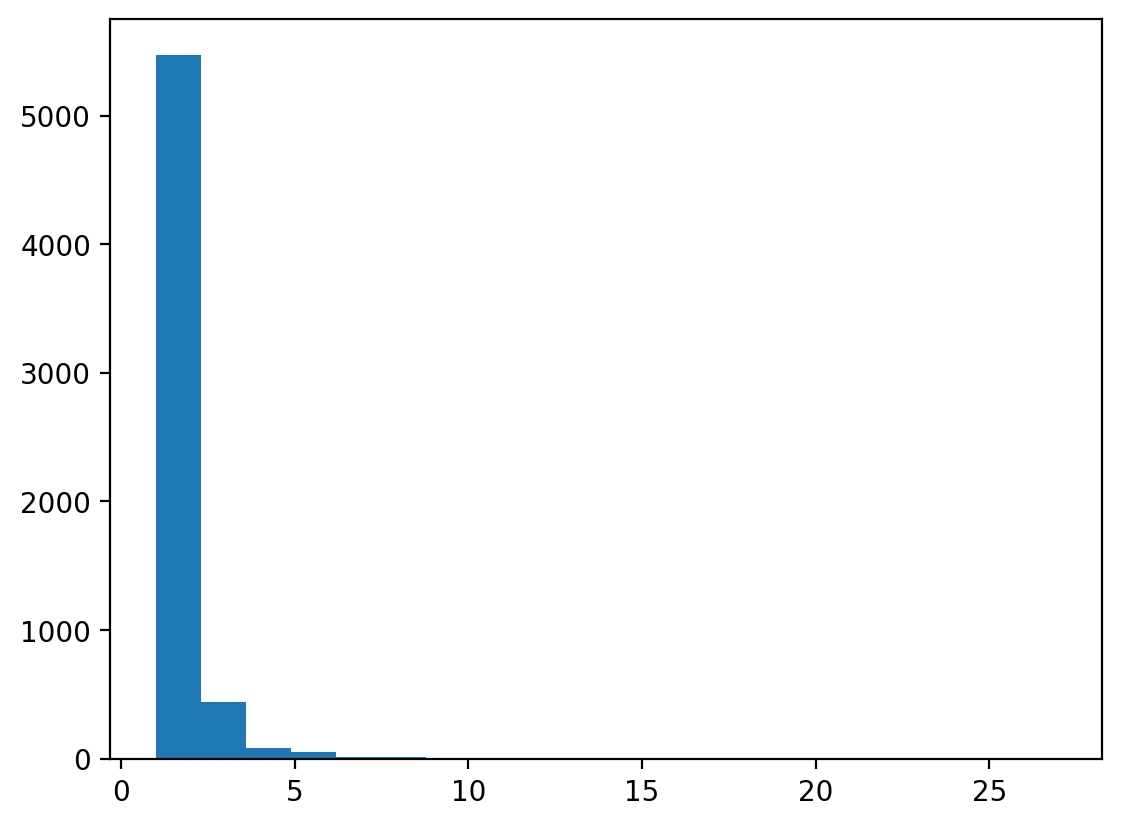

In [474]:
# plot histogram of mean production per year
plt.hist(list(mean_production_per_year.values()), bins=20)

In [449]:
authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in lead_um_works:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["display_name"] == "University of Maribor":
                            authors_year[year].append(author["author"]["display_name"])

                        

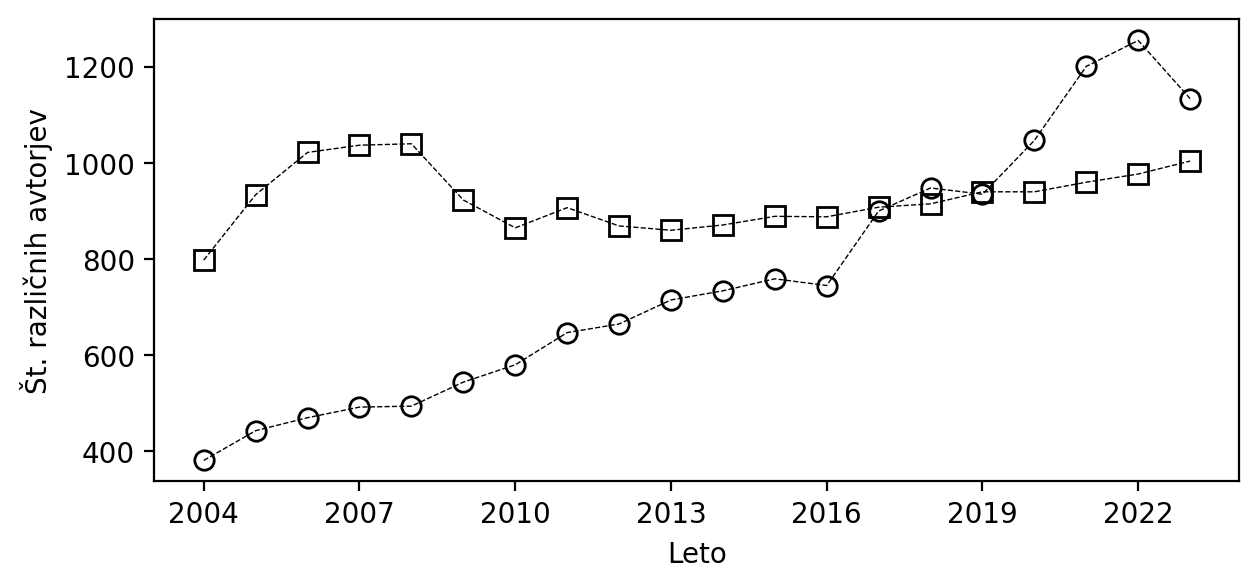

In [450]:
# plot unique authors per year
authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Št. različnih avtorjev')
# add um_staff to plot
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}
plt.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)


Text(0, 0.5, 'Št. zaposlenih')

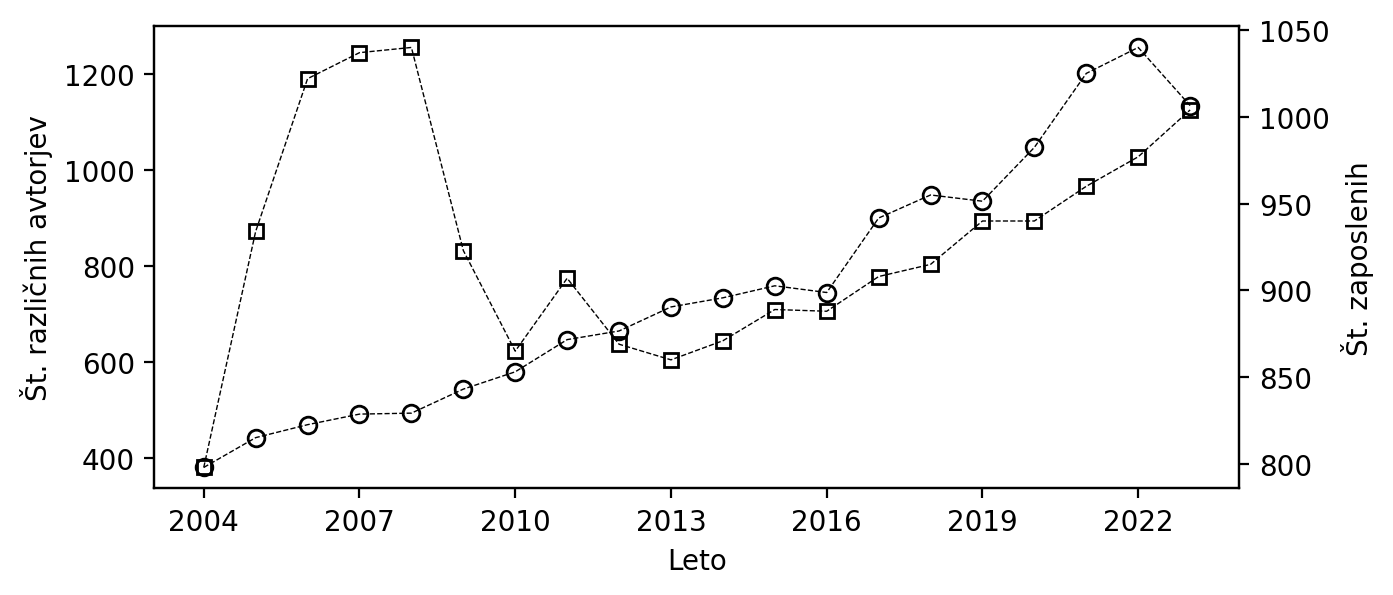

In [451]:
# plot unique authors per year vs um_staff per year
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax2.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('Št. različnih avtorjev', color='black')
ax2.set_ylabel('Št. zaposlenih', color='black')


Text(0, 0.5, 'Št. različnih avtorjev/zaposlenega')

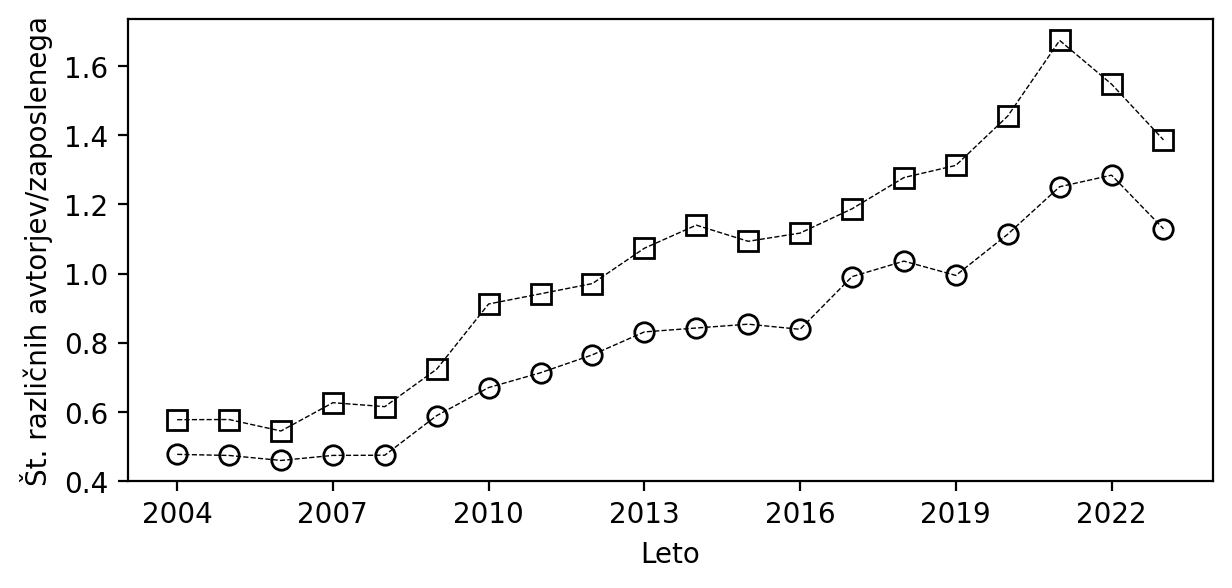

In [452]:
# plot unique authors per year/um_staff per year
authors_year_unique_staff_ratio = {k: v / um_staff[k] for k, v in authors_year_unique.items()}
authors_year_unique_staff_ratio = dict(sorted(authors_year_unique_staff_ratio.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique_staff_ratio.keys()), list(authors_year_unique_staff_ratio.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.plot(list(work_year_staff_ratio.keys()), list(work_year_staff_ratio.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)

# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Leto')
plt.ylabel('Št. različnih avtorjev/zaposlenega')


In [475]:
um_skupina_H = {2005: 181, 2006: 240, 2007: 228, 2008: 234, 2009: 207, 2010: 238, 2011: 244, 2012: 210, 2013: 211, 2014: 175, 2015: 149, 
                2016: 159, 2017: 184, 2018: 219, 2019: 289, 2020: 289, 2021: 296, 2022: 262, 2023: 303}

Text(0, 0.5, 'Št. zaposlenih v skupini H')

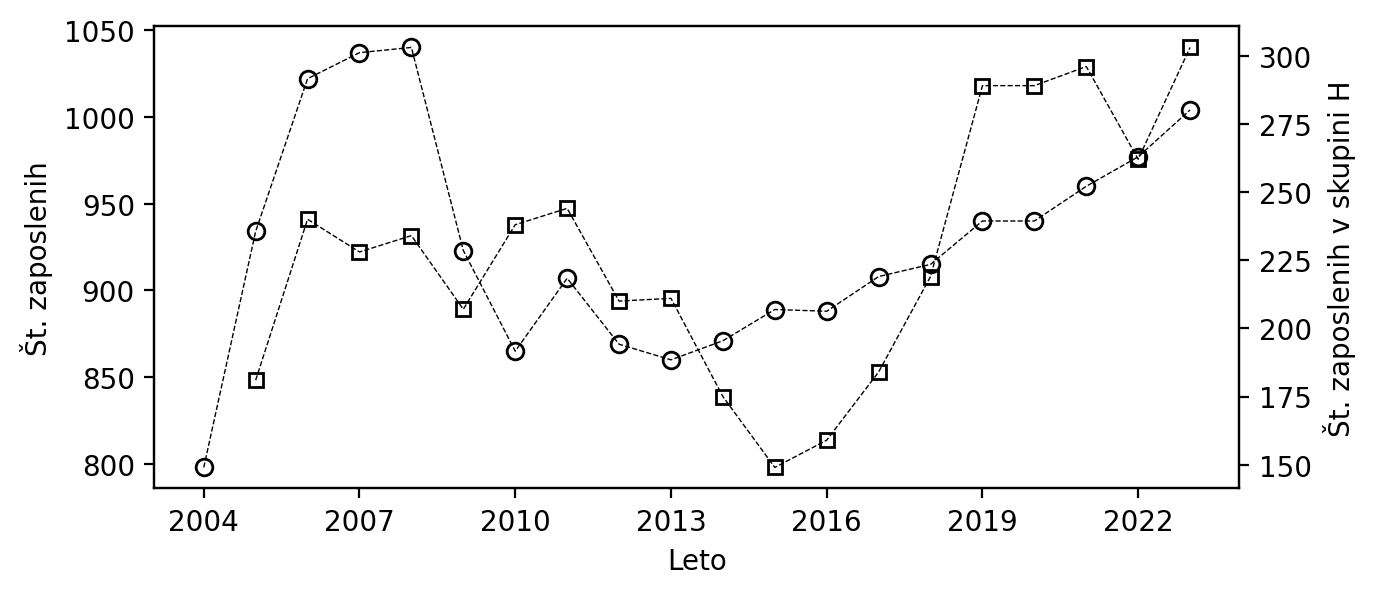

In [476]:
# plot um_staff and um_skupina_H from 2005 to 2023
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(um_staff.keys()), list(um_staff.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax2.plot(list(um_skupina_H.keys()), list(um_skupina_H.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('Št. zaposlenih', color='black')
ax2.set_ylabel('Št. zaposlenih v skupini H', color='black')


In [478]:
# sum um_staff and um_skupina_H from 2005 to 2023 into um_research, should go from 2005 to 2023
um_research = {k: um_staff[k] + um_skupina_H[k] for k in um_skupina_H.keys()}

{2005: 1115,
 2006: 1262,
 2007: 1265,
 2008: 1274,
 2009: 1130,
 2010: 1103,
 2011: 1151,
 2012: 1079,
 2013: 1071,
 2014: 1046,
 2015: 1038,
 2016: 1047,
 2017: 1092,
 2018: 1134,
 2019: 1229,
 2020: 1229,
 2021: 1256,
 2022: 1239,
 2023: 1307}

Text(0, 0.5, 'Št. zaposlenih')

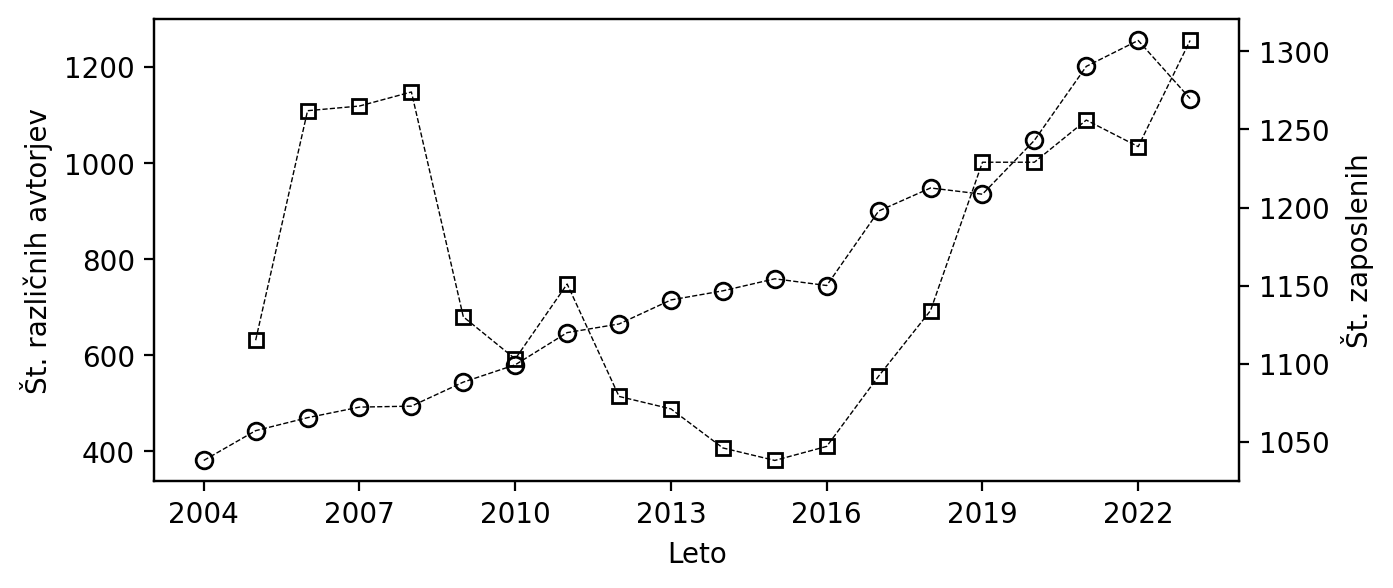

In [482]:
# plot unique authors per year vs um_staff per year
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
#ax2.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# add um_research to plot
ax2.plot(list(um_research.keys()), list(um_research.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)

# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('Št. različnih avtorjev', color='black')
ax2.set_ylabel('Št. zaposlenih', color='black')


Text(0, 0.5, 'št. avtorjev, št. zaposlenih')

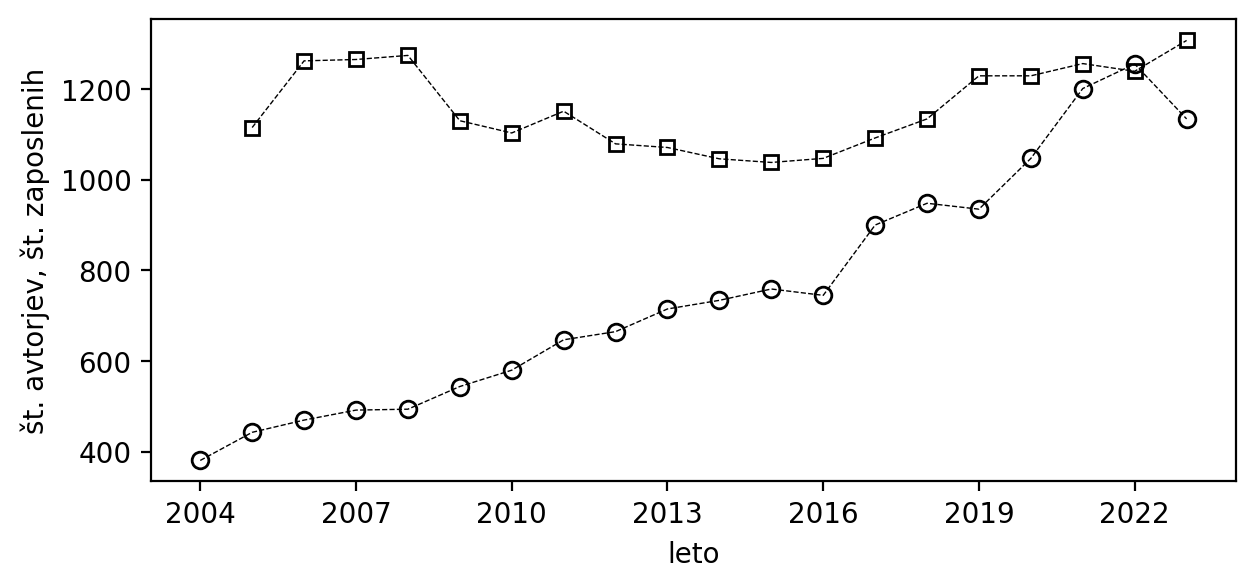

In [486]:
# plot unique authors per year
authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(um_research.keys()), list(um_research.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('leto')
plt.ylabel('št. avtorjev, št. zaposlenih')

In [487]:
authors_year_sets = {}
for year in range(2004, 2024):
    authors_year_sets[year] = set(authors_year[year])

jaccard_per_year = {}
years = sorted(authors_year_sets.keys())

for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i+1]
    A = authors_year_sets[y1]
    B = authors_year_sets[y2]
    
    intersection = A.intersection(B)
    union = A.union(B)
    
    jaccard_index = len(intersection) / len(union) if len(union) > 0 else 0
    jaccard_per_year[(y1, y2)] = jaccard_index

# Izpis
for (y1, y2), j_idx in jaccard_per_year.items():
    print(f"Jaccard med {y1} in {y2}: {j_idx:.3f}")


Jaccard med 2004 in 2005: 0.338
Jaccard med 2005 in 2006: 0.327
Jaccard med 2006 in 2007: 0.320
Jaccard med 2007 in 2008: 0.316
Jaccard med 2008 in 2009: 0.329
Jaccard med 2009 in 2010: 0.330
Jaccard med 2010 in 2011: 0.353
Jaccard med 2011 in 2012: 0.335
Jaccard med 2012 in 2013: 0.329
Jaccard med 2013 in 2014: 0.340
Jaccard med 2014 in 2015: 0.338
Jaccard med 2015 in 2016: 0.345
Jaccard med 2016 in 2017: 0.320
Jaccard med 2017 in 2018: 0.319
Jaccard med 2018 in 2019: 0.363
Jaccard med 2019 in 2020: 0.381
Jaccard med 2020 in 2021: 0.357
Jaccard med 2021 in 2022: 0.320
Jaccard med 2022 in 2023: 0.329


In [488]:
intersection_count = {}
for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i+1]
    intersection_count[(y1, y2)] = len(authors_year_sets[y1].intersection(authors_year_sets[y2]))

for (y1, y2), count in intersection_count.items():
    print(f"Skupno avtorjev v {y1} in {y2}: {count}")


Skupno avtorjev v 2004 in 2005: 208
Skupno avtorjev v 2005 in 2006: 225
Skupno avtorjev v 2006 in 2007: 233
Skupno avtorjev v 2007 in 2008: 237
Skupno avtorjev v 2008 in 2009: 257
Skupno avtorjev v 2009 in 2010: 279
Skupno avtorjev v 2010 in 2011: 320
Skupno avtorjev v 2011 in 2012: 329
Skupno avtorjev v 2012 in 2013: 342
Skupno avtorjev v 2013 in 2014: 368
Skupno avtorjev v 2014 in 2015: 377
Skupno avtorjev v 2015 in 2016: 386
Skupno avtorjev v 2016 in 2017: 399
Skupno avtorjev v 2017 in 2018: 447
Skupno avtorjev v 2018 in 2019: 501
Skupno avtorjev v 2019 in 2020: 547
Skupno avtorjev v 2020 in 2021: 591
Skupno avtorjev v 2021 in 2022: 596
Skupno avtorjev v 2022 in 2023: 592


In [489]:
# 1) Zgradimo slovar: avtor -> seznam let, ko se je pojavil
author_years = {}

for year, authors in authors_year_sets.items():
    for a in authors:
        if a not in author_years:
            author_years[a] = []
        author_years[a].append(year)

# 2) Za vsakega avtorja preverimo največje število zaporednih let
core_3_count = 0
core_5_count = 0

for author, yrs in author_years.items():
    sorted_years = sorted(yrs)
    
    max_streak = 1
    current_streak = 1
    
    # Pregledamo zaporedne letnice
    for i in range(1, len(sorted_years)):
        if sorted_years[i] == sorted_years[i-1] + 1:
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 1
    max_streak = max(max_streak, current_streak)
    
    # Preverimo, če ustreza "core" definiciji
    if max_streak >= 3:
        core_3_count += 1
    if max_streak >= 5:
        core_5_count += 1

print(f"Število avtorjev z vsaj 3 zaporednimi leti objav: {core_3_count}")
print(f"Število avtorjev z vsaj 5 zaporednimi leti objav: {core_5_count}")


Število avtorjev z vsaj 3 zaporednimi leti objav: 1048
Število avtorjev z vsaj 5 zaporednimi leti objav: 541


In [490]:
churn_per_year = {}
for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i + 1]
    A = authors_year_sets[y1]
    B = authors_year_sets[y2]
    
    # Avtorji, ki so "izpadli" med y1 in y2
    churn_set = A.difference(B)
    
    churn_rate = len(churn_set) / len(A) if len(A) > 0 else 0
    churn_per_year[y1] = churn_rate

for y, c in churn_per_year.items():
    print(f"Churn iz leta {y} v {y+1}: {c:.2%}")


Churn iz leta 2004 v 2005: 45.41%
Churn iz leta 2005 v 2006: 49.21%
Churn iz leta 2006 v 2007: 50.43%
Churn iz leta 2007 v 2008: 51.83%
Churn iz leta 2008 v 2009: 47.98%
Churn iz leta 2009 v 2010: 48.71%
Churn iz leta 2010 v 2011: 44.83%
Churn iz leta 2011 v 2012: 49.15%
Churn iz leta 2012 v 2013: 48.57%
Churn iz leta 2013 v 2014: 48.53%
Churn iz leta 2014 v 2015: 48.64%
Churn iz leta 2015 v 2016: 49.14%
Churn iz leta 2016 v 2017: 46.44%
Churn iz leta 2017 v 2018: 50.33%
Churn iz leta 2018 v 2019: 47.15%
Churn iz leta 2019 v 2020: 41.50%
Churn iz leta 2020 v 2021: 43.55%
Churn iz leta 2021 v 2022: 50.37%
Churn iz leta 2022 v 2023: 52.83%


In [491]:
def get_5year_window_authors(start_year, authors_year_sets, window_size=5):
    # start_year, npr. 2004
    # window_size, npr. 5
    # Vrne množico avtorjev za obdobje start_year..(start_year + window_size - 1)
    combined = set()
    for y in range(start_year, start_year + window_size):
        if y in authors_year_sets:
            combined = combined.union(authors_year_sets[y])
    return combined


In [492]:
authors_5yr_window = {}
years_range = range(2004, 2024)  # 2004 do 2023
window_size = 5

for end_year in range(2004 + window_size - 1, 2024):
    start_year = end_year - (window_size - 1)
    authors_5yr_window[end_year] = get_5year_window_authors(start_year, authors_year_sets, window_size)


In [493]:
jaccard_5yr = {}
sorted_end_years = sorted(authors_5yr_window.keys())

for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    set1 = authors_5yr_window[y1]
    set2 = authors_5yr_window[y2]
    
    inters = set1.intersection(set2)
    union = set1.union(set2)
    jaccard = len(inters) / len(union) if len(union) else 0
    jaccard_5yr[(y1, y2)] = jaccard

for (y1, y2), j_idx in jaccard_5yr.items():
    print(f"5-letni Jaccard {y1}–{y2}: {j_idx:.3f}")


5-letni Jaccard 2008–2009: 0.814
5-letni Jaccard 2009–2010: 0.783
5-letni Jaccard 2010–2011: 0.801
5-letni Jaccard 2011–2012: 0.786
5-letni Jaccard 2012–2013: 0.790
5-letni Jaccard 2013–2014: 0.805
5-letni Jaccard 2014–2015: 0.807
5-letni Jaccard 2015–2016: 0.822
5-letni Jaccard 2016–2017: 0.756
5-letni Jaccard 2017–2018: 0.771
5-letni Jaccard 2018–2019: 0.809
5-letni Jaccard 2019–2020: 0.793
5-letni Jaccard 2020–2021: 0.776
5-letni Jaccard 2021–2022: 0.753
5-letni Jaccard 2022–2023: 0.807


In [494]:
churn_5yr = {}
for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    
    A = authors_5yr_window[y1]
    B = authors_5yr_window[y2]
    lost_authors = A.difference(B)
    
    churn_rate = len(lost_authors) / len(A) if len(A) else 0
    churn_5yr[(y1, y2)] = churn_rate

for (y1, y2), c_rate in churn_5yr.items():
    print(f"Churn 5-letno okno {y1}–{y2}: {c_rate:.2%}")


Churn 5-letno okno 2008–2009: 6.91%
Churn 5-letno okno 2009–2010: 9.67%
Churn 5-letno okno 2010–2011: 8.47%
Churn 5-letno okno 2011–2012: 9.02%
Churn 5-letno okno 2012–2013: 8.38%
Churn 5-letno okno 2013–2014: 8.43%
Churn 5-letno okno 2014–2015: 8.12%
Churn 5-letno okno 2015–2016: 8.93%
Churn 5-letno okno 2016–2017: 10.22%
Churn 5-letno okno 2017–2018: 9.88%
Churn 5-letno okno 2018–2019: 8.80%
Churn 5-letno okno 2019–2020: 8.97%
Churn 5-letno okno 2020–2021: 7.73%
Churn 5-letno okno 2021–2022: 10.96%
Churn 5-letno okno 2022–2023: 9.56%


In [495]:
lead_um_works[0]

{'id': 'https://openalex.org/W2162145193',
 'doi': 'https://doi.org/10.1109/tevc.2006.872133',
 'title': 'Self-Adapting Control Parameters in Differential Evolution: A Comparative Study on Numerical Benchmark Problems',
 'display_name': 'Self-Adapting Control Parameters in Differential Evolution: A Comparative Study on Numerical Benchmark Problems',
 'publication_year': 2006,
 'publication_date': '2006-12-01',
 'ids': {'openalex': 'https://openalex.org/W2162145193',
  'doi': 'https://doi.org/10.1109/tevc.2006.872133',
  'mag': '2162145193'},
 'language': 'en',
 'primary_location': {'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1109/tevc.2006.872133',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S93787993',
   'display_name': 'IEEE Transactions on Evolutionary Computation',
   'issn_l': '1089-778X',
   'issn': ['1089-778X', '1941-0026'],
   'is_oa': False,
   'is_in_doaj': False,
   'is_core': True,
   'host_organization': 'https://openalex.org/P4310319808',
 